# Regression Comparison

## Jorge Alberto Padilla Gutierrez

The image processing was done thanks to kapernikov guide on image classification :)

But I changed to PIL since it worked better

# Imports

In [22]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from collections import Counter
from PIL import Image

# Algorithm

In [3]:
def resize_images(src, name, include, width=420, height=None):
    """
    I am trying to rezise the images to a 420p resolution
    And also store them in RGB format so I can use their variables
    """
    # height will be equal to width if not defined
    height = height if height is not None else width

    data = dict()
    data['description'] = f"resized ({width}x{height})world wonder images in rgb"
    data['label'] = []          # This will be our 'y'
    data['filename'] = []
    data['data'] = []           # This would contain our Xs

    # The pickle file is new for me, not sure if necesary
    pklname = f"{name}_{width}x{height}.pkl"

    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current = os.path.join(src, subdir)
            for file in os.listdir(current):
                if file[-3:] in {'jpg', 'png'}:      # png jpg, maybe jpeg fails?
                    try:
                        print(file)
                        image = Image.open(os.path.join(current, file))
                        image = image.resize((width, height))  # is this all?
                        image = image.convert('RGB')
                        data['label'].append(subdir)
                        data['filename'].append(file)
                        data['data'].append(image)
                    except:
                        print(f'{file} failed, skipping')
                        pass
        joblib.dump(data,pklname)



In [4]:
# Let's test that
path = fr'{os.path.abspath(os.getcwd())}\..\data\raw'

name = "wonders"
width = 420
# Testing some dirs, not all
include = {
    'Potala Palace',
    'El Palacio de las Bellas Artes',
    'El Angel de la Independencia',
    'Alhambra',
    'Amundsen-Scott Research Station',
    'Great Pyramid of Giza',
    'Stonehenge'
}

# Uncoment this line to re-generate file
resize_images(path, name, include, width)
# file was moved to data/processed

Alhambra
Image_1.jpg
Image_10.jpg
Image_100.jpg
Image_11.jpg
Image_12.jpg
Image_13.jpg
Image_14.jpg
Image_15.jpg
Image_16.jpg
Image_18.jpg
Image_19.jpg
Image_20.jpg
Image_21.jpg
Image_22.jpg
Image_23.jpg
Image_24.jpg
Image_25.jpg
Image_26.jpg
Image_27.jpg
Image_28.jpg
Image_29.jpg
Image_3.jpg
Image_30.jpg
Image_31.jpg
Image_32.jpg
Image_33.jpg
Image_34.jpg
Image_35.jpg
Image_36.jpg
Image_37.jpg
Image_38.jpg
Image_39.jpg
Image_4.jpg
Image_40.jpg
Image_41.jpg
Image_42.jpg
Image_43.png
Image_44.jpg
Image_45.jpg
Image_46.jpg
Image_47.jpg
Image_48.jpg
Image_49.jpg
Image_50.jpg
Image_51.png
Image_52.png
Image_53.png
Image_54.jpg
Image_55.jpg
Image_56.jpg
Image_57.jpg
Image_58.jpg
Image_59.jpg
Image_6.jpg
Image_60.jpg
Image_61.jpg
Image_63.jpg
Image_64.jpg
Image_66.jpg
Image_67.jpg
Image_68.jpg
Image_69.jpg
Image_7.jpg
Image_70.jpg
Image_71.jpg
Image_72.jpg
Image_73.jpg
Image_74.jpg
Image_75.jpg
Image_76.jpg
Image_77.jpg
Image_78.jpg
Image_79.jpg
Image_8.jpg
Image_80.jpg
Image_81.jpg
Image_82

In [5]:
data = joblib.load(fr'{os.path.abspath(os.getcwd())}\..\notebooks\wonders_420x420.pkl')

print('Samples: ', len(data['data']))
print('Keys: ', list(data.keys()))
print('Description: ', data['description'])
print('Labels:', np.unique(data['label']))
 
Counter(data['label'])

Samples:  669
Keys:  ['description', 'label', 'filename', 'data']
Description:  resized (420x420)world wonder images in rgb
Labels: ['Alhambra' 'Amundsen-Scott Research Station'
 'El Angel de la Independencia' 'El Palacio de las Bellas Artes'
 'Great Pyramid of Giza' 'Potala Palace' 'Stonehenge']


Counter({'Potala Palace': 101,
         'Great Pyramid of Giza': 98,
         'Amundsen-Scott Research Station': 96,
         'Alhambra': 94,
         'El Angel de la Independencia': 94,
         'El Palacio de las Bellas Artes': 94,
         'Stonehenge': 92})

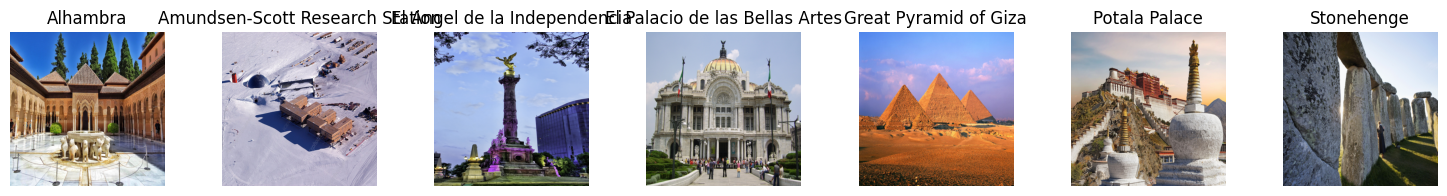

In [6]:
# Print them with plt
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# Print only one for each label
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

Up to this point I will no longer use the guide of Kapernikov :)

# Homework

In [7]:
# Choose two variables within your Project
X = np.array(data['data'], dtype=object)
y = np.array(data['label'])

print(X)
print(y)

[[[[26 89 187]
   [27 91 189]
   [28 94 193]
   ...
   [112 72 43]
   [204 157 109]
   [208 157 112]]

  [[26 90 188]
   [28 92 191]
   [29 93 193]
   ...
   [93 54 32]
   [194 147 101]
   [210 161 115]]

  [[28 92 190]
   [29 93 193]
   [30 95 194]
   ...
   [68 34 17]
   [192 144 100]
   [210 161 115]]

  ...

  [[179 201 214]
   [187 209 222]
   [192 215 228]
   ...
   [163 185 203]
   [162 185 203]
   [157 180 198]]

  [[190 212 224]
   [194 216 228]
   [198 220 233]
   ...
   [171 193 212]
   [167 189 207]
   [166 189 207]]

  [[192 215 225]
   [195 217 228]
   [198 219 231]
   ...
   [178 201 219]
   [178 201 219]
   [173 196 214]]]


 [[[167 198 242]
   [167 198 242]
   [167 198 242]
   ...
   [184 203 243]
   [184 203 243]
   [184 203 243]]

  [[167 198 242]
   [167 198 242]
   [167 198 242]
   ...
   [185 204 244]
   [185 204 244]
   [184 203 243]]

  [[167 198 242]
   [167 198 242]
   [167 198 242]
   ...
   [185 204 244]
   [185 204 244]
   [185 204 244]]

  ...

  [[20 33 2

In [41]:
# Need to do 1 dimention for X
X = np.reshape(X, (len(X), -1, ))
y[y == 'Alhambra'] = np.float64(-3.0)
y[y == 'Amundsen-Scott Research Station'] = np.float64(-2.0)
y[y == 'El Angel de la Independencia'] = np.float64(-1.0)
y[y == 'El Palacio de las Bellas Artes'] = np.float64(0.0)
y[y == 'Great Pyramid of Giza'] = np.float64(1.0)
y[y == 'Potala Palace'] = np.float64(2.0)
y[y == 'Stonehenge'] = np.float64(3.0)

print(X)
print(y)
print(X.shape)
print(y.shape)

[[26 89 187 ... 173 196 214]
 [167 198 242 ... 59 56 52]
 [42 42 34 ... 24 39 2]
 ...
 [147 153 177 ... 11 38 1]
 [93 60 26 ... 83 51 32]
 [138 178 229 ... 124 110 99]]
['-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3'
 '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3'
 '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3'
 '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3'
 '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3'
 '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3'
 '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-3' '-2' '-2' '-2' '-2'
 '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2'
 '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2'
 '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2'
 '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2'
 '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2' '-2'

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Scikit Learn Models

This one was chosen since it is the most efficient for the amount of data values that we use, even considering that in this homework we are not using the whole data set

In [30]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

print(f"LinearRegression\nBias: {model_lr.intercept_}\nWeights: {model_lr.coef_}")

model_sgd = SGDRegressor()
model_sgd.fit(X_train,y_train.reshape(-1))

print(f"SGDRegressor\nBias: {model_sgd.intercept_}\nWeights: {model_sgd.coef_}")

LinearRegression
Bias: 0.6896185379143265
Weights: [-2.47520068e-06 -3.70729003e-06 -1.59416861e-06 ... -5.11850995e-07
  8.05706211e-07 -7.52939702e-07]
SGDRegressor
Bias: [1.21242023e+10]
Weights: [-2.02050057e+12 -2.68538970e+12 -3.06886499e+12 ... -1.53177640e+12
 -3.53899198e+11  6.34231964e+11]


Only used those 2 methods, since array is too big for polynomial

In [46]:
def mse(y, y_hat):
        return np.mean((np.float32(y) - y_hat)**2)

def rmse(y, y_hat):
        return np.sqrt(np.mean((np.float32(y) - y_hat)**2))

def mae(y, y_hat):
        return np.mean(abs(np.float32(y) - y_hat))

In [32]:
y_train_predicted_lr = model_lr.predict(X_train)
y_train_predicted_sgd = model_sgd.predict(X_train)

y_test_predicted_lr = model_lr.predict(X_test)
y_test_predicted_sgd = model_sgd.predict(X_test)

In [47]:
m_train, n_train = X_train.shape
m_test, n_test = X_test.shape
print(f'Linear Regression')
print(f'MSE\nTrain: {mse(y_train.reshape(m_train, 1), y_train_predicted_lr)}\nTest: {mse(y_test.reshape(m_test, 1), y_test_predicted_lr)}')
print(f'RMSE\nTrain: {rmse(y_train.reshape(m_train, 1), y_train_predicted_lr)}\nTest: {rmse(y_test.reshape(m_test, 1), y_test_predicted_lr)}')
print(f'MAE\nTrain: {mae(y_train.reshape(m_train, 1), y_train_predicted_lr)}\nTest: {mae(y_test.reshape(m_test, 1), y_test_predicted_lr)}')
print(f'Gradient Descent')
print(f'MSE\nTrain: {mse(y_train.reshape(m_train, 1), y_train_predicted_sgd)}\nTest: {mse(y_test.reshape(m_test, 1), y_test_predicted_sgd)}')
print(f'RMSE\nTrain: {rmse(y_train.reshape(m_train, 1), y_train_predicted_sgd)}\nTest: {rmse(y_test.reshape(m_test, 1), y_test_predicted_sgd)}')
print(f'MAE\nTrain: {mae(y_train.reshape(m_train, 1), y_train_predicted_sgd)}\nTest: {mae(y_test.reshape(m_test, 1), y_test_predicted_sgd)}')

Linear Regression
MSE
Train: 7.573230849855884
Test: 7.387853251009676
RMSE
Train: 2.75195037198273
Test: 2.7180605679435614
MAE
Train: 2.2225591754738407
Test: 2.2414667529961902
Gradient Descent
MSE
Train: 6.132195477944552e+36
Test: 4.731849018928164e+36
RMSE
Train: 2.4763270135312404e+18
Test: 2.175281365462446e+18
MAE
Train: 1.9855203523435343e+18
Test: 1.7970163229619297e+18


Linear Regression

MSE

Train: 7.573230849855884

Test: 7.387853251009676

RMSE

Train: 2.75195037198273

Test: 2.7180605679435614

MAE

Train: 2.2225591754738407

Test: 2.2414667529961902

Gradient Descent

MSE

Train: 6.132195477944552e+36

Test: 4.731849018928164e+36

RMSE

Train: 2.4763270135312404e+18

Test: 2.175281365462446e+18

MAE

Train: 1.9855203523435343e+18

Test: 1.7970163229619297e+18